# One-Sample z-Test

## Introduction

A one-sample z test is the most basic type of hypothesis test and is performed where the population means and standard deviation are known. This makes the analysis very simple. The main takeaway from this lesson and accompanied lab is to have an idea around the process of hypothesis testing and understanding test statistics and p-values. 

## Objectives:
You will be able to:
* Understand and explain use cases for a 1-sample z-test
* Set up null and alternative hypotheses
* Calculate z statistic using z-tables and cdf functions
* Calculate and interpret p-value for significance of results

## 1-sample z-test

>The 1-sample z-test is best suited for situations where we we want to investigate whether a given "sample" comes from a particular "population". 

For example, suppose you are doing an investigation on the data collected from successive cohorts of students taking the data science classes. You may want to ask yourself whether a particular sample of students is similar to or different from student population in general in terms of any of its attributes (age, performance, marital/social status etc.) 

In situations like one above, a 1-sample Z test is used only for testing of the sample mean. Following this notion, our hypothesis would test whether the average of our sample students suggests that this sample comes from a population with a know mean or whether it comes from a different population. Examples of when we would likely know the population standard deviation are for things like IQ scores, SAT or ACT scores (those standardized college entrance exams) and heights and weights.

So let's set up a problem scenario (known as a research question or analytical question) and apply a 1-sample z-test, while explaining all the steps required to call our results "statistically significant".

## The Analytical Question 

>A researcher wants to study the effects of mentoring on intelligence scores. He wants to know as a baseline what the average intelligence of his students were relative to the general population. He used a standardized IQ test which has a mean of 100 and standard deviation of 16. The 50 students in his study scored an average of 102 on the IQ test. At He wants to investigate the fact whether the increase is IQ for the sample students is due to mentoring. 

## Step 1: State Your Hypotheses

### The Alternative Hypothesis (Ha)

Our alternative hypothesis would always reflect the the idea/theory that needs to be tested. For our problem, this would mean that we want to test if the mentoring has resulted as a significant increase in student IQ. So, we would write it down as:

> Sample mean is **significantly** greater than the population mean

Again, significance is the key here. IF we denote sample mean as (M), and population mean as mu (μ), we can write our alternative hypothesis as:

>**Ha : μ < M**

We test our alternative hypothesis where mu is less than m. We could, in other situations, check for both possibilities of being less than as well as greater than by checking  μ ≠ M. 

Maybe the mentoring results as a lower IQ .. who knows !

<img src="https://cdn-images-1.medium.com/max/1280/1*ewjLY5tKZCkCZCjU1y8KAg.jpeg" width=400>

Let's just check for the siginificant increase for now to keep the process simple. 

### The Null Hypothesis (Ho)

For 1-sample z-test, we define our null hypothesis as that there is no significant difference between specified sample and population, any observed difference may be present due to sampling or experimental error. Considering this, for our problem, we can define a null hypothesis(Ho) as:

> There is no **significant** difference between sample mean and population mean 

Remember the emphasis here is on significant difference, rather than just difference which we could simply calculate by subtracting mean values. 

IF we denote sample mean as (M), and population mean as mu (μ), mathematically, this null hypothesis can be written as:

> **Ho : μ >= M**

## Step 2: Specify a Significance Level (alpha)

So now that we have our hypotheses is in place, what we want to do is REJECT our null hypothesis, instead of trying to prove our alternative hypothesis. Thats the way significance testing works. It takes a lot more to actually prove your intuition as a "scientific theory". By rejecting the null hypothesis, you can confidently say that your results are significant. And for this, you need to set a significance level (called alpha)

>The significance level is the probability of rejecting Ho when it is true, so it is the probability of accepting H1 when Ho is true and by the above, the significance level is the probablity that you ''think'' that you found evidence while in ''reality'' it is false evidence.

Yes, it takes some getting used to come in terms with this. Putting it simply, the significance level is the probability that you find "false evidence".

For general experimenting, the significance level (alpha) is .05 i.e. there is 5 percent chance that you will reject null hypothesis when it is true. So later we'll see that if our results follow this pattern, we will be able to say that "With a confidence level of 95%, we can state that ....". For a z-distribution, this can be shown as below:
![](https://slideplayer.com/slide/9325599/28/images/6/Types+of+Hypothesis+Tests.jpg)

For testing both sides of the distribution , we need to do a 2-tail test to see if mentoring lowers OR highers the IQ of student. Each red region would calculated as alpha/2. When testing of single side (as in with our example) i.e. just higher OR just lower, we use a 1-tail test as shown in the first and second images. The alpha value we need to test is 0.05 or 5%. i.e.

> The probabilities of seeing a value equal to or greater than our test statistic.


## Step 3: Calculate the test statistic

For z-tests, a z-statistic is used as our test statistic. There are other statistics suitable of different types of tests. A 1-sample z-statistic is calculated as:

![](http://sites.nicholas.duke.edu/statsreview/files/2013/06/zstat.png)

This formula slightly difference from standard score foruma we saw earlier. Itincludes square root of n to reflect we are dealing with a sample variance here. 
All you do is put in the values you are given into the formula. Your question should give you the sample mean (x̄), the standard deviation (σ) of population, and the number of items in the sample (n). Your hypothesized mean (in other words, the mean you are testing the hypothesis for, or your null hypothesis) is μ0.

So let's calculate this. 

In [1]:
import scipy.stats as stats
from math import sqrt
x_bar = 102 # sample mean 
n = 50 # number of students
sigma = 16 # sd of population
mu = 100 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

0.8838834764831844

Let's try to plot this z value on a standard normal distribution to see what it means. 

Text(0.5, 1.0, 'z-statistic = 0.88')

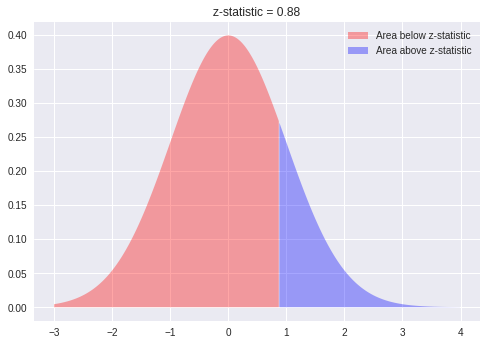

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-3,0.88,0.01),
                 y1= stats.norm.pdf(np.arange(-3,0.88,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(0.88,4,0.01), 
                 y1= stats.norm.pdf(np.arange(0.88,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 0.88')

## Step 4:  Calculate the p-Value

Remember z values in a standard normal distribution represent standard deviations. the standard deviation. A we did before, we shall look up related probability values in a z table, or use scipy.stats to calculate it directly. So cumulative probability upto z-value can be calculated as:

In [8]:
stats.norm.cdf(z)

0.8116204410942089

The percent of area under the normal curve from negative infinity to .88 z score is 81.2% (from z-table and calculations), meaning the average intelligence of this set of students is greater than 81.2% of the population. But we wanted it to be greater than 95% to prove our hypothesis to be significantly correct. 


And we get our p value probability by subtracting z value from 1 , as sum of probabilities in a normal distribution is always 1

In [9]:
pval = 1 - stats.norm.cdf(z)
pval

0.18837955890579106

## Step 5: Interpret p-value

So our p value (0.18) is much larger than our set alpha of 0.05. So what does that mean ? Have we failed ? and iq increase has nothing to do with mentoring ? 

Well we cant say that for sure. What we can say is that there is a weak evidence to reject the null hypothesis with given sample. There are ways to scale such experiments up and collect more data, apply sampling techniques to be sure about the real impact. 

When the sample data helps in rejecting null hypothesis, we still cant be too sure of the outcome, however we can say that given the evidence our results show a SIGNIFICANT increase in the IQ as a result of mentoring - instead of saying - "Mentoring improves IQ".

## Summary 

In this lesson we saw how to run a 1-sample z-test to compare sample and population where the population mean and standard deviation are known. This is the most basic test in statistics as in real world, true population means and sd are rarely identifiable and you have to work with sample statistics. Thats where most advanced tests come in to play. We shall look at those in next statistics section. 